In [66]:
original_dataset_dir = 'dataset/flowers-recognition/flowers'

In [67]:
import os
classes_names = os.listdir(original_dataset_dir)
classes = {}
for s in classes_names:
    classes[s] = len(os.listdir(original_dataset_dir +
                                          '/' +
                                          s))
import pandas as pd

inputdata = {'flower':None, 'count':None}
inputdata['flower'] = [f for f, c in classes.items()]
inputdata['count'] = [c for f, c in classes.items()]

df = pd.DataFrame(inputdata)
print('image count mean:', int(df['count'].mean()))
print('total image count:', df['count'].sum())
df

image count mean: 865
total image count: 4326


,flower,count
0,daisy,769
1,dandelion,1055
2,rose,784
3,sunflower,734
4,tulip,984


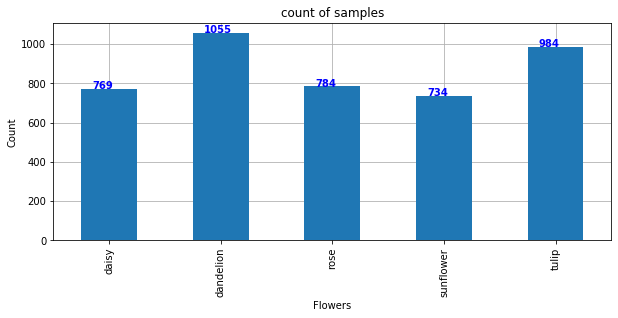

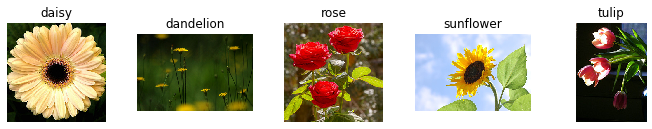

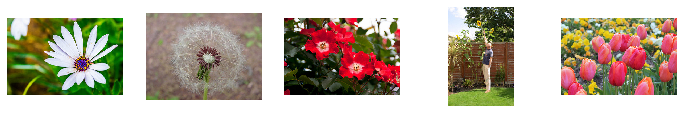

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

ax = df.plot.bar(zorder=2, figsize=(10, 4))
plt.title('count of samples')
plt.grid(zorder=0)
for i, c in df.iterrows():
    v = c['count']
    cc='blue'
    val = str(v)
    plt.text(i-.15, v + 1, val, color=cc, fontweight='bold')
plt.xlabel('Flowers')   
plt.ylabel('Count')
plt.xticks(ticks=np.arange(len(df['flower'])), labels=df['flower']);
ax.get_legend().remove()
plt.show()

fig = plt.figure(figsize=(12,4))
for i, f in enumerate(df['flower'].tolist()):
    sample = os.listdir(os.path.join(original_dataset_dir, f))[20]
    img = mpimg.imread(os.path.join(original_dataset_dir, f, sample))
    
    a = fig.add_subplot(2, 5, i + 1)
    imgplot = plt.imshow(img)
    a.set_title(f)
    plt.axis('off')
plt.show()

fig = plt.figure(figsize=(12,4))
for i, f in enumerate(df['flower'].tolist()):
    sample = os.listdir(os.path.join(original_dataset_dir, f))[21]
    img = mpimg.imread(os.path.join(original_dataset_dir, f, sample))
    
    a = fig.add_subplot(2, 5, i + 1)
    imgplot = plt.imshow(img)
    plt.axis('off')
plt.show()

In [79]:
test_ratio = .25
validation_ratio = .33

In [81]:
#### import os, shutil
from random import shuffle

def mkdir_with_cheker(path):
    if not os.path.exists(path): os.mkdir(path)
        
base_dir = 'dataset/flowers-recognition_configed'
mkdir_with_cheker(base_dir)

input_data_dir = {'test':None, 'train':None, 'validation':None}

for d in input_data_dir:
    tmppath = os.path.join(base_dir, d)
    mkdir_with_cheker(tmppath)
    input_data_dir[d] = tmppath
    
fnames = {}
image_count_limit = 3665 #3665
input_limit_perclass = int(image_count_limit/len(df['flower']))

# make directories
for f in df['flower']:
    mkdir_with_cheker(os.path.join(input_data_dir['train'], f))
    mkdir_with_cheker(os.path.join(input_data_dir['validation'], f))
    mkdir_with_cheker(os.path.join(input_data_dir['test'], f))
    
    fnames[f] = os.listdir(os.path.join(original_dataset_dir, f))
    
# copy images  
total_input_counter = 0
train_input_counter = 0
validation_input_counter = 0
test_input_counter = 0

for destination, destination_dir in input_data_dir.items():
    print(destination)
    for flower, file_list in fnames.items():
        counter = 0
        shuffle(file_list)
        
        # apply limit 
        file_list = file_list[:input_limit_perclass]
        
        test_count = int(len(file_list)*test_ratio)
        train_count = int(len(file_list)*(1-test_ratio))
        valicdation_count = int(train_count*validation_ratio)
        
        if destination == 'train': 
            input_count = train_count - valicdation_count
        elif destination == 'validation': 
            input_count = valicdation_count
        elif destination == 'test': 
            input_count = test_count
        
        dellist = []
        for image in file_list:
            src = os.path.join(original_dataset_dir, flower, image)
            dst = os.path.join(destination_dir, flower, image)
            shutil.copyfile(src, dst)
            counter += 1
            dellist.append(image)
            if counter >= input_count: break
        
        file_list = [i for i in file_list if i not in dellist] 
        
        tmplen = len(os.listdir(os.path.join(destination_dir, flower)))
        print('\t', flower, tmplen)
        total_input_counter += tmplen
        
        if destination == 'test': test_input_counter += tmplen
        elif destination == 'validation': validation_input_counter += tmplen
        elif destination == 'train': train_input_counter += tmplen
            
print('-'.join(['' for i in range(0, 16)]))
print('total input count:', total_input_counter)
print('test input count:', test_input_counter)
print('train input count:', train_input_counter)
print('validation input count:', validation_input_counter)

test
	 daisy 183
	 dandelion 183
	 rose 183
	 sunflower 183
	 tulip 183
train
	 daisy 368
	 dandelion 368
	 rose 368
	 sunflower 368
	 tulip 368
validation
	 daisy 181
	 dandelion 181
	 rose 181
	 sunflower 181
	 tulip 181
---------------
total input count: 3660
test input count: 915
train input count: 1840
validation input count: 905
